# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [47]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [48]:

iris_data = load_iris()


In [49]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data.data)
    df.columns = iris_data.feature_names
    df = df.rename(columns={'sepal length (cm)':'sepal length','sepal width (cm)':'sepal width','petal length (cm)':'petal length','petal width (cm)':'petal width'})
    df['target'] = iris_data.target
    df['class'] = iris_data.target_names[iris_data.target]
    
    return df
df_iris = create_df()

In [50]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [51]:

#From our data we will only get variable columns as np.array
x = np.array(df_iris[['sepal length','sepal width','petal length','petal width']])
# YOUR CODE HERE

In [52]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [53]:
mergings = 0 
### BEGIN SOLUTION
samples=x
mergings=linkage(samples,method='complete')
### END SOLUTION

In [54]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

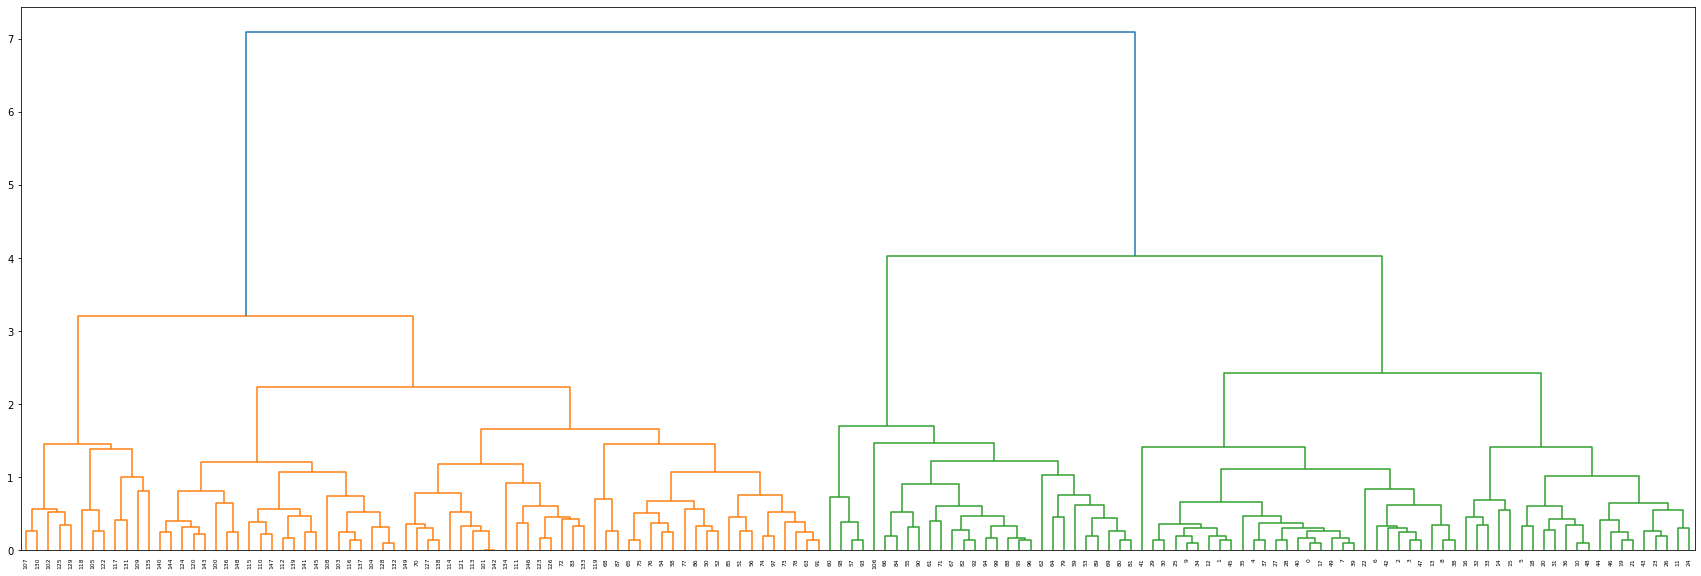

In [55]:
plt.figure(figsize=(30,10))
dn=dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()


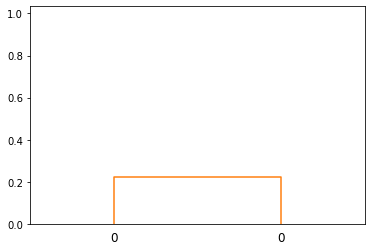

In [56]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [57]:
from sklearn.cluster import KMeans

df = pd.read_csv('ch1ex1.csv')
points = df.values

new_df = pd.read_csv('ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [60]:
model = 0
model = KMeans(n_clusters=3)

In [61]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [62]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [63]:
# YOUR CODE HERE
labels= model.predict(points)

In [64]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [65]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_1 = []
    data_2 = []
    for i,j in enumerate(labels):
        if j==0:
            data_0.append(points[i])
        elif j==1:
            data_1.append(points[i])
        elif j==2:
            data_2.append(points[i])
    return data_0,data_1,data_2

data_0,data_1,data_2 = separate_labels(labels,points)
data_0 = np.array(data_0)
data_1 = np.array(data_1)
data_2 = np.array(data_2)   

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(111, 2)
(95, 2)
(94, 2)


In [66]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

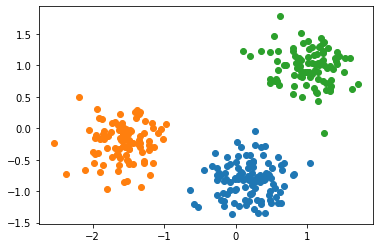

In [67]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1])
plt.scatter(data_1[:,0],data_1[:,1])
plt.scatter(data_2[:,0],data_2[:,1])

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [68]:

# YOUR CODE HERE
new_labels=model.predict(new_points)


In [69]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [70]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

new_0,new_1,new_2 = separate_labels(new_labels,new_points)
new_0 = np.array(new_0)
new_1 = np.array(new_1)
new_2 = np.array(new_2)


In [71]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

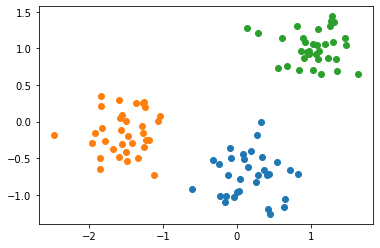

In [73]:
#plot the new labels
plt.scatter(new_0[:,0],new_0[:,1])
plt.scatter(new_1[:,0],new_1[:,1])
plt.scatter(new_2[:,0],new_2[:,1])
plt.show()

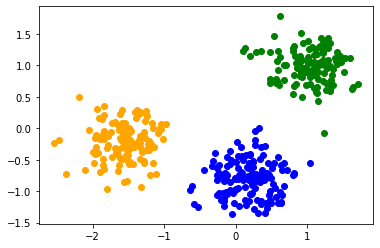

In [74]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1],c='blue')
plt.scatter(data_1[:,0],data_1[:,1],c='orange')
plt.scatter(data_2[:,0],data_2[:,1],c='green')

plt.scatter(new_0[:,0],new_0[:,1],c='blue')
plt.scatter(new_1[:,0],new_1[:,1],c='orange')
plt.scatter(new_2[:,0],new_2[:,1],c='green')